<a href="https://colab.research.google.com/github/yassineloop/ProjectNLP/blob/main/fatwa_Arabic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Introduction

Dans cet article, nous allons créer un bot de discussion Fatwa très basique, mais d'abord qu'est-ce que Fatwa [الفتوئ]?
Dans l'Islam, l'acte de demander une décision sur une affaire s'appelle une Fatwa, en d'autres termes c'est une question que vous posez à une autorité reconnue pour recevoir une réponse qui est une décision sur votre point.

Maintenant, qu'est-ce que cela a à voir avec un bot de discussion ? Émettre une fatwa, c'est en quelque sorte répondre à une question qui est une tâche qu'un chat bot est capable de faire. Nous essaierons d'abstraire le processus d'émission d'une fatwa en une tâche de base de réponse à une question bien que nous soyons conscients que l'abstraction d'une tâche d'inférence complexe comme celle-ci en un problème simple produira des résultats peu fiables, mais nous le ferons pour le plaisir de jouer avec un chat. robot. 

###Comment les chatbots fonctionne ?

Il existe en gros deux variantes de chatbots : Rule-Based et Self-learning..

   1- Dans une approche **Rule-Based**, un bot répond à des questions basées sur certaines règles sur lesquelles il est formé. Les règles définies peuvent être très simples à très complexes. Les bots peuvent traiter des questions simples mais ne peuvent pas gérer des questions complexes.
   2- Les bots **Self-learning** sont ceux qui utilisent certaines approches basées sur l'apprentissage automatique et sont définitivement plus efficaces que les bots basés sur des règles. Ces bots peuvent être de deux autres types : Retrieval Based ou bien Generative

i) Dans les modèles **retrieval-based**, un chatbot utilise une certaine heuristique pour sélectionner une réponse à partir d'une bibliothèque de réponses prédéfinies. Le chatbot utilise le message et le contexte de la conversation pour sélectionner la meilleure réponse à partir d'une liste prédéfinie de messages de bot. Le contexte peut inclure une position actuelle dans l'arbre de dialogue, tous les messages précédents de la conversation, des variables préalablement enregistrées (par exemple, le nom d'utilisateur). Les heuristiques pour la sélection d'une réponse peuvent être conçues de différentes manières, de la logique conditionnelle "if-else" basée sur des règles aux classificateurs d'apprentissage machine.

ii) Les bots générateurs (**Generative**) peuvent générer les réponses et pas toujours les réponses avec une des réponses d'un ensemble de réponses. Cela les rend plus intelligents car ils prennent mot à mot la requête et génèrent les réponses.

Les technologies utlisées :

-Scikit library et NLTK.

-NLP (Natural Language Processing)
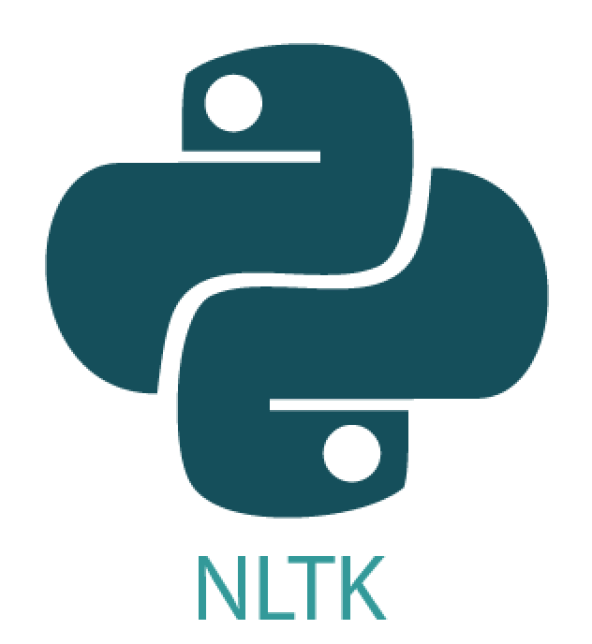

#NLP (Natural Language Processing) :

Le domaine d'étude qui se concentre sur les interactions entre le langage humain et les ordinateurs est appelé traitement du langage naturel, ou PNL en abrégé. Il se situe à l'intersection de l'informatique, de l'intelligence artificielle et de la linguistique informatique [Wikipedia]. La PNL est un moyen pour les ordinateurs pour analyser, comprendre et déduire le sens du langage humain d'une manière intelligente et **utile**. En utilisant la PNL, les développeurs peuvent organiser et structurer les connaissances pour effectuer des tâches telles que le résumé automatique, la traduction, la reconnaissance d'entités nommées, l'extraction de relations, l'analyse des sentiments, la reconnaissance de la parole et la segmentation de sujets.

### Téléchargement et installation de NLTK
NLTK (Natural Language Toolkit) est une plateforme de référence pour la réalisation des programmes Python destinés à fonctionner avec des données en langage humain. Elle fournit des interfaces faciles à utiliser pour plus de 50 corpus et ressources lexicales telles que WordNet, ainsi qu'une suite de bibliothèques de traitement de texte pour la classification, la tokenisation, le balisage, l'analyse et le raisonnement sémantique, des enveloppes pour les bibliothèques de PNL de niveau industriel.

La NLTK a été qualifiée de "merveilleux outil pour l'enseignement et le travail en linguistique informatique utilisant Python" et de "bibliothèque étonnante pour jouer avec le langage naturel".

Le traitement du langage naturel avec Python fournit une introduction pratique à la programmation pour le traitement du langage. Je recommande vivement ce livre aux personnes qui débutent en PNL avec Python.

In [ ]:
!pip install nltk

In [ ]:
!pip install keras

In [ ]:
!pip install numpy

In [ ]:
!pip install Scikit-learn

In [ ]:
!pip install Pandas

In [ ]:
!pip install seq2seq-lstm

In [ ]:
!pip install tensorflow

##camel tools

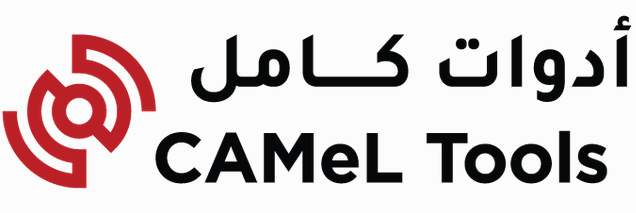


CAMeL Tools is a suite of Arabic natural language processing tools developed by the CAMeL Lab at New York University Abu Dhabi.[2]

In [ ]:
%pip install camel-tools

In [73]:
%pip install camel-tools

from google.colab import drive
import os

drive.mount('/gdrive')

%mkdir /gdrive/MyDrive/camel_tools

os.environ['CAMELTOOLS_DATA'] = '/gdrive/MyDrive/camel_tools'

!export | camel_data full

from google.colab import drive
import os

drive.mount('/gdrive')
os.environ['CAMELTOOLS_DATA'] = '/gdrive/MyDrive/camel_tools'

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
mkdir: cannot create directory ‘/gdrive/MyDrive/camel_tools’: File exists
Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


# Tagging using camel
The disambiguation example above is not very readable due to the amount of list and dictionary dereferencing just to extract a feature.
Additionally, for general tagging applications, extracting a feature from the top analysis is not sufficient.
There are some edge cases that need to be handled. For example, a word could return no analyses at all if the word isn't in the morphological database. We would then need to check the result of each disambiguated word to see if an analysis exists and then output some default value if not. Furthermore, the default value would differ depending on what feature we are tagging.

To handle these edge cases and to simplify the usage of a disambiguator, we provide the [`DefaultTagger`](https://camel-tools.readthedocs.io/en/latest/api/tagger/default.html#camel_tools.tagger.default.DefaultTagger) class which wraps a disambiguator and handles edge cases by providing sensible default values. The example below shows 

In [ ]:
from camel_tools.tokenizers.word import simple_word_tokenize
from camel_tools.disambig.mle import MLEDisambiguator
from camel_tools.tagger.default import DefaultTagger

mle = MLEDisambiguator.pretrained()
tagger = DefaultTagger(mle, 'pos')

# The tagger expects pre-tokenized text
sentence = simple_word_tokenize('نجح بايدن في الانتخابات')

pos_tags = tagger.tag(sentence)

print(pos_tags)

###Generating Response 
Afin de générer une réponse de notre bot pour les questions saisie par les utilisateurs, ,nous utiliserons le concept de similarité des documents. Nous avons donc commencé par importer les modules nécessaires.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from camel_tools.tokenizers.word import simple_word_tokenize
from camel_tools.disambig.mle import MLEDisambiguator
from camel_tools.tokenizers.morphological import MorphologicalTokenizer

data = pd.read_csv("full_dataset.csv")
vectorizer = TfidfVectorizer()
flag=True
vectorizer.fit(data.values.ravel())
print("بوت: اسمي بوت ,  اسالني علي  اي فتوي مرحبا !")

 
while(flag==True):

    question = input('Please enter a question: \n')
    # if detect(question)!="ar":
    #  break;
    #else:
    # The tokenizer expects pre-tokenized text
    question = question.lower()
    question = simple_word_tokenize(question)
    #print(question)
    # Load a pretrained disambiguator to use with a tokenizer
    

 
    if(question!='بسلامة'):
        if(question=='شكرا' or question=='شكرا جزيلا' ):             
            flag=False
            print("العفو صديقي .. مرحبا في اي وقت")

        else:
            question = vectorizer.transform(question)
            rank = cosine_similarity(question, vectorizer
                            .transform(data['Question'].values))
            top = np.argsort(rank, axis=-1).T[-5:].tolist()
    
    
            for item in top:
       
                reps = data['Answer'].iloc[item].values[0]
      
            print("بوت:",reps)
    else:
        flag=False
        print("بوت: مع سلامة ..")
    